In [1]:
%load_ext autoreload
%autoreload 2
import pttfunc
import gc
gc.collect()
%reset out
%reset array

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Flushing output cache (0 entries)
Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [15]:
import numpy as np
from itertools import combinations, chain
from scipy.misc import comb

count = comb(50000*50000, 2, exact=True)
print count

3124999998750000000


In [3]:
## load raw data

import pickle
with open('/Users/joekaojoekao/PycharmProjects/push/github/gossiping_push.pickle', 'rb') as f:
    #ptt_pushes = json.load(f)
    ptt_pushes_tuple = pickle.load(f)
    
import jieba
import jieba.analyse
jieba.set_dictionary('dict.txt.big')
jieba.analyse.set_stop_words('stopword_pool/merged_stopword.txt')


#for path in glob.glob("/Users/joekaojoekao/Desktop/webptt/out/"+author_name+"/*.*")

In [4]:
print len(ptt_pushes_tuple)
import re
cleaned_ptt_pushes_tuple = []
#pattern = re.compile(r"^[A-Za-z0-9]*$")
for uid, push in ptt_pushes_tuple:
    cleaned_ptt_pushes_tuple.append((re.sub(r'\W+', '', uid), push))


print len(cleaned_ptt_pushes_tuple)

281660
281660


In [6]:
import json
cleaned_ptt_pushes = {}
for uid, push in cleaned_ptt_pushes_tuple:
    if uid not in cleaned_ptt_pushes:
        cleaned_ptt_pushes[uid] = [push]
    else:
        cleaned_ptt_pushes[uid].append(push)
        
with open('/Users/joekaojoekao/PycharmProjects/push/github/gossiping_pushes_json.txt', 'wb') as fout:
    fout.write(json.dumps(cleaned_ptt_pushes, indent=2, ensure_ascii=False).encode('utf-8'))
    fout.close()

In [204]:
import json
import io

#each id separate
ptt_pushes = {} #{uid:([raw_push],[push_grams],(word, loc_begin, loc_end),(word, weighting)}

for uid, push in cleaned_ptt_pushes_tuple:
    if len(push) > 0:
        push_info = {}
#         print 'origin:', push
#         print 'cut:'
        seg_list = list(jieba.cut(push, cut_all=False))
#         for s in seg_list:
#             print s,'/',
#         print '\nlocation:'
        words = list(jieba.tokenize(push))
#         for s in words:
#             print s[0],':',s[1],'-',s[2],'/',
#         print '\ntags:'
        tags = list(jieba.analyse.extract_tags(push, 10, withWeight=True))
#         for s in tags:
#             print s[0],':',s[1],'/',
        
#         print '\ntextrank:'
#         rank = jieba.analyse.textrank(push)
#         for s in rank:
#             print s[0],':',s[1],'/',
        push_info = {'gram': seg_list, 'location': words, 'weight':tags}
    
        
    if uid not in ptt_pushes:
        ptt_pushes[uid] = [push_info]
    else:
        ptt_pushes[uid].append(push_info)
    
    #print '\n---------------------'
    


Building prefix dict from /Users/joekaojoekao/PycharmProjects/push/github/dict.txt.big ...
DEBUG:jieba:Building prefix dict from /Users/joekaojoekao/PycharmProjects/push/github/dict.txt.big ...
Dumping model to file cache /var/folders/qn/v8s1xx6d7qgclyhkk1t701zc0000gn/T/jieba.u28e5fd167ca6b25e789769ad04c48668.cache
DEBUG:jieba:Dumping model to file cache /var/folders/qn/v8s1xx6d7qgclyhkk1t701zc0000gn/T/jieba.u28e5fd167ca6b25e789769ad04c48668.cache
Loading model cost 4.72516298294 seconds.
DEBUG:jieba:Loading model cost 4.72516298294 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


In [198]:
# import re

# # def removekey(d, key):
# #     r = dict(d)
# #     del r[key]
# #     return r
# #print ptt_pushes['Destery']
# #print ptt_pushes['Destery     ']
# key_list = []
# print len(ptt_pushes)
# n = 0
# pattern = re.compile(r"^[A-Za-z0-9]*$")
# for k in ptt_pushes.keys():
#     m = re.match(pattern, k)
#     if m != None:
#         key_list.append(m.group(0))
#     #print m
#     #break
# key_list = list(set(key_list))
# print len(key_list)
# #49655
# #47235
# cleaned_ptt_pushes = {}
# for k in ptt_pushes.keys():
#     new_k = ""
#     m = re.match(pattern, k)
#     if m != None:
#         new_k = m.group(0)
#     if len(new_k) > 0 and new_k in key_list:
#         value = ptt_pushes[k]
#         if new_k == 'Destery':
#             print 'hi'
#         if new_k not in cleaned_ptt_pushes:
#             cleaned_ptt_pushes[new_k] = value
#         else:
#             cleaned_ptt_pushes[new_k] += value

49655
47235
hi


In [206]:
print json.dumps(ptt_pushes['Destery'], indent=4, sort_keys=True)
#print json.dumps(ptt_pushes['Destery     '], indent=4, sort_keys=True)
print len(ptt_pushes['Destery'])
#print len(ptt_pushes['Destery     '])

[
    {
        "gram": [
            "\u9664\u4e86", 
            "\u4e0d\u73a9", 
            " ", 
            "\u53c8", 
            "\u4e0d\u80fd", 
            "\u8981\u6c42", 
            "\u4ed6", 
            "\u66f4\u6539", 
            "\u904a\u6232\u898f\u5247", 
            " ", 
            "\u5c0d", 
            "\u5427", 
            "?"
        ], 
        "location": [
            [
                "\u9664\u4e86", 
                0, 
                2
            ], 
            [
                "\u4e0d\u73a9", 
                2, 
                4
            ], 
            [
                " ", 
                4, 
                5
            ], 
            [
                "\u53c8", 
                5, 
                6
            ], 
            [
                "\u4e0d\u80fd", 
                6, 
                8
            ], 
            [
                "\u8981\u6c42", 
                8, 
                10
            ], 
            [
      

In [197]:
print len(cleaned_ptt_pushes)
import json
print json.dumps(cleaned_ptt_pushes['Destery'], indent=4, sort_keys=True)
print len(cleaned_ptt_pushes['Destery'])

47235
[
    {
        "gram": [
            "\u90fd", 
            "\u662f", 
            "\u53ef\u4ee5", 
            "\u4f5c\u5f0a", 
            "\u7684", 
            "\u6771\u897f", 
            "\u54ea\u88e1", 
            "\u516c\u6b63", 
            " ", 
            "\u9817", 
            "\u310f"
        ], 
        "location": [
            [
                "\u90fd", 
                0, 
                1
            ], 
            [
                "\u662f", 
                1, 
                2
            ], 
            [
                "\u53ef\u4ee5", 
                2, 
                4
            ], 
            [
                "\u4f5c\u5f0a", 
                4, 
                6
            ], 
            [
                "\u7684", 
                6, 
                7
            ], 
            [
                "\u6771\u897f", 
                7, 
                9
            ], 
            [
                "\u54ea\u88e1", 
                9, 
   

In [207]:
with open('/Users/joekaojoekao/PycharmProjects/push/github/gossiping_push_jieba_json.txt', 'wb') as fout:
    #json.dump(ptt_pushes, fout, indent=2, ensure_ascii=False)
    fout.write(json.dumps(ptt_pushes, indent=2, ensure_ascii=False).encode('utf-8'))
    fout.close()

#sample_id = random.sample(ptt_pushes.keys(),3)

# for k in ptt_pushes.keys()[0:10]:
#     print k#, ptt_pushes[k]
# #print 'SAMPLE_ID:', ', '.join(sample_id)

In [208]:
import json

#merge all pushes
merged_ptt_pushes = {} #{[raw_push],[push_grams],(word, loc_begin, loc_end),(word, weighting)}
seg_list= []
words = []
tags = []

for uid, push in ptt_pushes_tuple:
    if len(push) > 0:
#         print 'origin:', push
#         print 'cut:'
        seg_list.append(list(jieba.cut(push, cut_all=False)))
#         for s in seg_list:
#             print s,'/',
#         print '\nlocation:'
        words.append(list(jieba.tokenize(push)))
#         for s in words:
#             print s[0],':',s[1],'-',s[2],'/',
#         print '\ntags:'
        tags.append(list(jieba.analyse.extract_tags(push, 10, withWeight=True)))
#         for s in tags:
#             print s[0],':',s[1],'/',
        
#         print '\ntextrank:'
#         rank = jieba.analyse.textrank(push)
#         for s in rank:
#             print s[0],':',s[1],'/',
merged_ptt_pushes = {'gram': seg_list, 'location': words, 'weight':tags}
    
        
#     if uid not in ptt_pushes:
#         ptt_pushes[uid] = [push_info]
#     else:
#         ptt_pushes[uid].append(push_info)
    
    #print '\n---------------------'
    
with open('/Users/joekaojoekao/PycharmProjects/push/github/merged_gossiping_push_jieba_json.txt', 'wb') as fout:
    fout.write(json.dumps(merged_ptt_pushes, indent=2, ensure_ascii=False).encode('utf-8'))
    fout.close()


In [209]:
from collections import Counter
##freq by ID sorted version
from collections import OrderedDict
ptt_pushes_freq_byID = {}
for uid, push_list in ptt_pushes.iteritems():
    #print uid
    id_count = Counter()
    for push_info in push_list:
        gram = push_info['gram']
        count = Counter(gram)
        temp = []
        for w, c in count.most_common():
            #print w, c
            temp.append((w, c))
        id_count += Counter(dict(temp))
        #print '------'
    #print 'id_result:'
    #for w, c in id_count.most_common():
        #print w,c
    
    ptt_pushes_freq_byID[uid] = dict(id_count)

with open('/Users/joekaojoekao/PycharmProjects/push/github/gossiping_push_jieba_freq_byID_json.txt', 'wb') as f_freqID:
    #json.dump(ptt_pushes, fout, indent=2, ensure_ascii=False)
    f_freqID.write(json.dumps(OrderedDict(ptt_pushes_freq_byID), indent=2, ensure_ascii=False).encode('utf-8'))
    f_freqID.close()


## sorted version
    
from collections import OrderedDict
ptt_pushes_freq_byID_sorted = {}
for k, v in ptt_pushes_freq_byID.items():
    #print k, OrderedDict(sorted(v.items(), key=lambda t: t[1], reverse=True))
    ptt_pushes_freq_byID_sorted[k] = OrderedDict(sorted(v.items(), key=lambda t: t[1], reverse=True))

with open('/Users/joekaojoekao/PycharmProjects/push/github/gossiping_push_jieba_freq_byID_sorted_json.txt', 'wb') as f_freqID:
    #json.dump(ptt_pushes, fout, indent=2, ensure_ascii=False)
    f_freqID.write(json.dumps(ptt_pushes_freq_byID_sorted, indent=2, ensure_ascii=False).encode('utf-8'))
    f_freqID.close()

In [210]:
##freq for all pushes sorted version
    
from collections import OrderedDict

count_all = Counter()
for v in ptt_pushes_freq_byID.values():
    count_all += Counter(v)
ptt_pushes_freq_all = dict(count_all)
ptt_pushes_freq_all_sorted = OrderedDict(sorted(ptt_pushes_freq_all.items(), key=lambda t: t[1], reverse=True))

with open('/Users/joekaojoekao/PycharmProjects/push/github/gossiping_push_jieba_freq_all_sorted_json.txt', 'wb') as f_freqALL:
    #json.dump(ptt_pushes, fout, indent=2, ensure_ascii=False)
    f_freqALL.write(json.dumps(ptt_pushes_freq_all_sorted, indent=2, ensure_ascii=False).encode('utf-8'))
    f_freqALL.close()

# Start from here

In [2]:
import pickle
import json

with open('/Users/joekaojoekao/PycharmProjects/push/github/gossiping_push.pickle', 'rb') as f:
    #ptt_pushes = json.load(f)
    ptt_pushes_tuple = pickle.load(f)
    

with open('/Users/joekaojoekao/PycharmProjects/push/github/gossiping_pushes_json.txt', 'rb') as fout:
    cleaned_ptt_pushes = json.load(fout)
    fout.close()
    
import jieba
import jieba.analyse
jieba.set_dictionary('dict.txt.big')
jieba.analyse.set_stop_words('stopword_pool/merged_stopword.txt')

with open('/Users/joekaojoekao/PycharmProjects/push/github/gossiping_push_jieba_json.txt', 'rb') as fout:
    ptt_pushes = json.load(fout)
    fout.close()
    
with open('/Users/joekaojoekao/PycharmProjects/push/github/merged_gossiping_push_jieba_json.txt', 'rb') as fout:
    merged_ptt_pushes = json.load(fout)
    fout.close()

with open('/Users/joekaojoekao/PycharmProjects/push/github/gossiping_push_jieba_freq_byID_sorted_json.txt', 'rb') as fout:
    ptt_pushes_freq_byID_sorted = json.load(fout)
    fout.close()
    
with open('/Users/joekaojoekao/PycharmProjects/push/github/gossiping_push_jieba_freq_all_sorted_json.txt', 'rb') as fout:
    ptt_pushes_freq_all_sorted = json.load(fout)
    fout.close()

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import json
#filter wordnum than pushnum

# with open('/Users/joekaojoekao/PycharmProjects/push/github/gossiping_pushes_json.txt', 'rb') as fout:
#     cleaned_ptt_pushes = json.load(fout)
#     fout.close()

#set gt_numword (meaningful), gt_numpush (active)
NUM_WORD_GT = 4
NUM_PUSH_GT = 1

new_pushes = {}
for k in cleaned_ptt_pushes.keys():
    gt_push = [x for x in cleaned_ptt_pushes[k] if len(x) > NUM_WORD_GT]
    if len(gt_push) > 0:
        new_pushes[k] = gt_push

user_list = []
for k in new_pushes.keys():
    if len(new_pushes[k]) > NUM_PUSH_GT:
        user_list.append(k)
        
print len(cleaned_ptt_pushes)
print len(new_pushes)
print len(user_list)
# user_list = []
# for k in cleaned_ptt_pushes.keys():
#     if len(cleaned_ptt_pushes[k]) > NUM_PUSH_GT:
#         user_list.append(k)
# print len(user_list)




48291
37651
20342


In [71]:
import random
for i in random.sample(range(len(user_list)), 5):
    #print i
    k = user_list[i]
    print '@',k, '@',
    for p in new_pushes[k]:
        print p

@ MAYDAYJJ @ 找不到你要的網頁zzzzzz
要上班怒推
推僧侶團www
XDDDDD
寫得很好 XD
@ sadomi @ 快報名遊行阿！！！！ 
怒了！！！！！！！   波波這種嘴臉令人可憎！
今天對付小小醫學生，以後就是對付鄉民的家人！！！
531活動報名 
  05/31（星期日）下午一點中正紀念堂大中至正門出發
--------------不要只顧推文要報名阿-------------------
    今日不反波，明日死於波！
@ loel1223 @ 因為沒聽過的法案就認為他不存在，我覺得能當到教授還挺
真的對公投盟的前輩們超感謝！感謝你們對台灣的努力！！
蔡教授保重身體，你要好好的活著看到台灣振作起來的那天
國民黨跟老共真可恥，愛台灣有什麼不對，只會拼命污名化
中天現在只剩9.2在看，一攻擊馬，他收視率會瞬間變0吧
主播承認自己假中立！！！這樣的媒體還有什麼公信力！
這才是公道話，職業是自己選擇的，無法勝任就改行啊
辛苦了，希望一些還被矇在鼓裡的警眷跟基層警察能覺悟！
b大會尊敬你爸是因為你不像原po一樣從小被打到大
就算是一般家庭的小孩從小被家暴也是會對著施暴者罵吧
警察非神職！一般家庭要負擔學貸辛苦工作養家的也大有人
在，況且警察薪水本就高子女又有教育補助，相信一般家庭
絕對比你們辛苦，感謝父母的警察子女也不必太過驕情
也說了警察是離職率最高的公職人員，做不來就選其他工作
別賴著不走又哭說很辛苦沒人諒解
俄羅斯人在民眾包圍中正一分局時馬上就感覺到方神有危險
趕緊搜尋到支持方神的粉絲團又按了讚XD~超屌的~~
幹！這啥小！現在賣台這麼明目張膽都不用遮掩的哦！
太陽花後來有外媒宣傳，從國外來按讚很正常啊，方神才成
立兩天又沒宣傳也沒外電，俄羅斯人還能大批來按讚很奇怪
很多香港的朋友相當關注這次學運也支持，按讚再正常不過
相較起來這幾天在網路上攻擊林義雄律師的人真的是惡魔
林義雄律師謝謝你為台灣的付出
支持臺灣有自己的主權！
領稅金不做事，上什麼ptt，付你薪水是讓你上網用的嗎？
往上看本人有說他國小上班啊，不是領稅金不然領什麼？
一般公司上班偷懶花的是老闆的錢，公務員上班偷懶花的
大家的納稅錢耶，然後政府還一天到晚靠北說缺錢！
教授保重啊~
教授心臟裝了7根支架，不能太過激動，某些人要留點口德
首謀！警察快來抓！！！
噓錯！推回來！今天若

In [42]:
print len(user_list)


26459


In [73]:
print ptt_pushes_freq_all_sorted.items()[0]

(u'\u975e\u672c\u8cea', 1)


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
#count = list(zip(*word)[1])
#print sorted(count, reverse=True)[0:100]
#a = plt.hist(count[10:100],bins=10)
word = ptt_pushes_freq_all_sorted.keys()

W_PERCENT = 0.025 #0.025
## setting for stopword & rareword percentage
stopwords = [x for x in word if ptt_pushes_freq_all_sorted[x] >= ptt_pushes_freq_all_sorted[word[int(len(word) * W_PERCENT)]]]
rarewords = [x for x in word if ptt_pushes_freq_all_sorted[x] <= ptt_pushes_freq_all_sorted[word[int(len(word) * (1-W_PERCENT))]]] #0.975

## stop word list
sw_list = [x for x in stopwords] 
## rare word list
rw_list = [x for x in rarewords] 
print 'total word', len(word)
print 'stop word', len(sw_list)
print 'rare word', len(rw_list)


sw_count_dict = {}
for w in sw_list:
    sw_count_dict.setdefault(len(w),[]).append(w)

## Data lookup
# import os
# import shutil

# folder = './num_word'+str(W_PERCENT)
# if not os.path.exists(folder):
#     os.makedirs(folder)
# else:
#     shutil.rmtree(folder)

# for k in count_dict.keys():
#     print k, len(count_dict[k])
#     f = open(folder+'/'+str(k)+'.txt', 'wb')
#     for w in count_dict[k]:
#         f.write(w.encode('utf-8')+'\n')
#     f.close()

K_NUMWORD = 6
selected_sw = []
for k in sw_count_dict.keys()[0:K_NUMWORD]:
    print 'num_word:',k,'\t',len(sw_count_dict[k])
    selected_sw += sw_count_dict[k]
print len(selected_sw)

total word 89715
stop word 3089
rare word 58383
num_word: 1 	786
num_word: 2 	2046
num_word: 3 	179
num_word: 4 	40
num_word: 5 	4
num_word: 6 	3
3058


In [ ]:
## for weighted jaccard & rare word joint count

SW_NUM = 1000
RW_NUM = 1000

def hasCHword(word):
    return any(u'\u4e00' <= c <= u'\u9fff' for c in word.decode('utf-8'))


def topNword(word_list, n):
    select = []
    count = 0
    for w, c in word_list:
        if hasCHword(w):
            select.append((w, c))
            count += 1
        if count == n:
            return select
        
def bottomNword(word_list, n):
    select = []
    count = 0
    for w, c in reversed(word_list):
        if hasCHword(w):
            select.append((w, c))
            count += 1
        if count == n:
            return select
        


select_sw = topNword(stopwords, SW_NUM)
select_rw = bottomNword(rarewords, RW_NUM)

print select_sw

In [214]:
print 'hi'

hi


In [16]:
print user_list[0:10]

[u'', u'nysky', u'quiet113', u'nocoffee1', u'fhuocrkt', u'emptie', u'canes', u'fromwilda', u'Magicwind', u'glory5566']


In [5]:
## stop word list
#sw_list = [x[0].decode('utf-8') for x in select_sw] 
## rare word list
#rw_list = [x[0].decode('utf-8') for x in select_rw] 

general_vec = {}

for uid in user_list: # for each user id
    user_len = sum(ptt_pushes_freq_byID_sorted[uid].values()) #total word freq
    #print sum(v.values())
    if user_len > 0:
        #vec = [jvc_grams_count[idx].get(w, 0) for w in new_sw_list] #stopword without function words
        
        vec = [ptt_pushes_freq_byID_sorted[uid].get(w, 0) for w in selected_sw]
        g_vec = [float(x) / user_len for x in vec]
        general_vec[uid] = g_vec
        #break

        ##process rare words vector
#         j_vec = [0] * len(rw_list)
#         for i, w in enumerate(rw_list):
#             if w not in ptt_grams_count[uid].keys():
#                 j_vec[i] = 0
#                 #j_vec[i] = None
#             else:
#                 j_vec[i] = ptt_grams_count[uid].get(w, 0)
#         rare_vec.append(j_vec)

In [79]:
## with the hypothesis that too much zero 
zero_list = []
for k in general_vec.keys():
    #print k, general_vec[k].count(0.0)
    zero_list.append((k, general_vec[k].count(0.0)))
    
print general_vec.values()[1]

[0.08333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [73]:
## not important(?) word threshold

# %matplotlib inline
# import numpy as np
# import matplotlib.pyplot as plt
# plt.plot(sorted([x[1] for x in zero_list]))
#np.histogram([x[1] for x in zero_list])
print len(general_vec)
print len(g_vec)

import random
r_list = random.sample(general_vec.items(), 100)
#print r_list
random_gv = dict((k, v) for k, v in r_list)
print len(random_gv.keys())
print len(set(random_gv.keys()))

20342
3058
100
100


In [81]:
#print general_vec['zxcvbn208']
n = 0
for g in general_vec.keys():
    #print g, general_vec[g]
    if all(v <= 0.001 for v in general_vec[g]):
        #new_general_vec = removekey(new_general_vec, g)
        n += 1
print n

25


In [82]:
def removekey(d, key):
    r = dict(d)
    del r[key]
    return r
print len(general_vec)
new_general_vec = general_vec
n = 0
for g in general_vec.keys():
    #print g, general_vec[g]
    if all(v == 0.0 for v in general_vec[g]):
        new_general_vec = removekey(new_general_vec, g)
        n += 1
print n
print len(new_general_vec)

n = 0
for g in new_general_vec.keys():
    if all(v == 0.0 for v in new_general_vec[g]):
        n += 1
print n
print new_general.vec.items()[0]

20342
25
20317
0


NameError: name 'new_general' is not defined

In [142]:
print new_general_vec.items()[10]

(u'jackloutter', [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07692307692307693, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07692307692307693, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07692307692307693, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [69]:
##mixed all features
import itertools
from scipy import spatial

import combination as gb
import random
r_list = random.sample(user_list, 100)
r_gv = [(k, general_vec[k]) for k in r_list]
#print r_list
#r_list = general_vec.items()
#random_gv = dict((k, v) for k, v in r_list)
#print random_gv
#print r_gv
comb = gb.getCombination(10)
#print comb
print comb.shape
#print random_gv.keys()

Array A finished
Array B finished
(45, 2)


In [61]:
import numpy as np
# mtype = 'U20, U20, f'
# s = np.zeros((0), dtype=mtype)
# print s
# s = np.append(s, np.array([('user1', 'user2', 0.5)], dtype=mtype))
# print s
# s = np.append(s, np.array([('user1', 'user1', 0.5)], dtype=mtype))
# print s
s = np.array((0.0, 0.0, 0.0))
s = np.vstack((s, np.array((0.0, 1.0, 0.5))))
s = np.vstack((s, np.array((3.0, 4.0, 0.1))))

s = np.vstack((s, np.array((9.0, 5.0, 0.3))))
#temp_user_id = random_gv.keys()
#final = tuple(map(tuple, s))
#print final
s = s[1:]
print s
s = np.sort(s, axis=0)
s = s[::-1]
print s[:]


[[ 0.   1.   0.5]
 [ 3.   4.   0.1]
 [ 9.   5.   0.3]]
[[ 9.   5.   0.5]
 [ 3.   4.   0.3]
 [ 0.   1.   0.1]]


In [80]:
import pttfunc


#mtype = 'U20, U20, f'
#sim_list = np.zeros((0), dtype=mtype)
sim_list = np.array((0.0, 0.0, 0.0))
for cb in comb:
    idx1 = cb[0]
    idx2 = cb[1]
    v1 = r_gv[idx1][1]
    v2 = r_gv[idx2][1]
    wj_sw = pttfunc.weighted_jacarrd(v1, v2)
    #sim_list = np.append(sim_list, np.array((k1, k2, wj_sw), dtype=mtype))
    sim_list = np.vstack((sim_list, np.array((round(float(idx1),1), round(float(idx2),1), wj_sw))))
print sim_list

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.00000000e+00   9.94764398e-02]
 [  0.00000000e+00   2.00000000e+00   6.71743800e-02]
 [  0.00000000e+00   3.00000000e+00   9.00586336e-02]
 [  0.00000000e+00   4.00000000e+00   1.31868132e-01]
 [  0.00000000e+00   5.00000000e+00   7.02576112e-02]
 [  0.00000000e+00   6.00000000e+00   4.39137134e-02]
 [  0.00000000e+00   7.00000000e+00   5.59980690e-02]
 [  0.00000000e+00   8.00000000e+00   7.22528851e-02]
 [  0.00000000e+00   9.00000000e+00   6.91814522e-02]
 [  1.00000000e+00   2.00000000e+00   5.59566787e-02]
 [  1.00000000e+00   3.00000000e+00   8.73389241e-02]
 [  1.00000000e+00   4.00000000e+00   6.45161290e-02]
 [  1.00000000e+00   5.00000000e+00   6.21387283e-02]
 [  1.00000000e+00   6.00000000e+00   1.29870130e-01]
 [  1.00000000e+00   7.00000000e+00   7.14285714e-02]
 [  1.00000000e+00   8.00000000e+00   7.17628705e-02]
 [  1.00000000e+00   9.00000000e+00   7.62394761e-02]
 [  2.00000000e+00   3.00000

[[  3.00000000e+00   7.00000000e+00   1.56843059e-01]
 [  6.00000000e+00   8.00000000e+00   1.49532710e-01]
 [  0.00000000e+00   4.00000000e+00   1.31868132e-01]
 [  1.00000000e+00   6.00000000e+00   1.29870130e-01]
 [  2.00000000e+00   3.00000000e+00   1.24593046e-01]
 [  3.00000000e+00   8.00000000e+00   1.19970194e-01]
 [  4.00000000e+00   8.00000000e+00   1.05263158e-01]
 [  0.00000000e+00   1.00000000e+00   9.94764398e-02]
 [  5.00000000e+00   8.00000000e+00   9.54891623e-02]
 [  2.00000000e+00   8.00000000e+00   9.27330560e-02]
 [  0.00000000e+00   3.00000000e+00   9.00586336e-02]
 [  1.00000000e+00   3.00000000e+00   8.73389241e-02]
 [  2.00000000e+00   7.00000000e+00   8.00788955e-02]
 [  3.00000000e+00   6.00000000e+00   7.84832451e-02]
 [  1.00000000e+00   9.00000000e+00   7.62394761e-02]
 [  3.00000000e+00   5.00000000e+00   7.62081784e-02]
 [  7.00000000e+00   8.00000000e+00   7.36736737e-02]
 [  0.00000000e+00   8.00000000e+00   7.22528851e-02]
 [  1.00000000e+00   8.00000

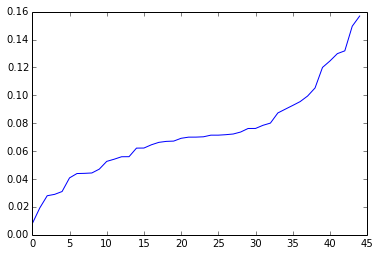

In [81]:
# sim_list.dtype = [("user1", "U20"), ("user2", "U20"), ("sim", "f")]
# sim_list.shape = sim_list.size
# sim_list.sort(order="sim")
# sim_list = sim_list[::-1]
sim_list = sim_list[1:]
sim_list = sim_list[sim_list[:,2].argsort()]
sim_list = sim_list[::-1]

print sim_list
# user_dict = {}
# i = 0
# for k in random_gv.keys():
#     user_dict[round(float(i),1)] = k
#     i += 1

#print user_dict

temp = []
for idx1, idx2, sim in sim_list:
    temp.append((user_list[int(idx1)], user_list[int(idx2)], sim))
print temp


    
#print user_sim
#print len(sim_list)

# user_sim = {}
# for i in sim_list:
#     if i[0] not in user_sim:
#         user_sim[i[0]] = [i[2]]
#     else: 
#         user_sim[i[0]].append(i[2])
#     if i[1] not in user_sim:
#         user_sim[i[1]] = [i[2]]
#     else: 
#         user_sim[i[1]].append(i[2])
plt.plot(sorted([x[2] for x in sim_list]))
#plt.plot(sorted(user_sim.values()[0]))

In [58]:
print temp

[(u'chinick1478', u'tbbhwinh', 0.15189986589181839), (u'eroschang888', u'tbbhwinh', 0.1266575994559673), (u'eroschang888', u'tbbhwinh', 0.11663522859965775), (u'vermilionred', u'tbbhwinh', 0.11628855218305999), (u'vermilionred', u'tbbhwinh', 0.11372774267662251), (u'vermilionred', u'tbbhwinh', 0.11290322580645164), (u'ousapas', u'tbbhwinh', 0.11144042679312381), (u'ousapas', u'tbbhwinh', 0.10676015999209852), (u'ousapas', u'tbbhwinh', 0.10575246949447982), (u'ousapas', u'chinick1478', 0.10201020102010193), (u'jhs710041', u'chinick1478', 0.096495220755575858), (u'jhs710041', u'chinick1478', 0.094477060230484841), (u'jhs710041', u'chinick1478', 0.092943282457131515), (u'jhs710041', u'chinick1478', 0.092243645924627554), (u'jhs710041', u'chinick1478', 0.090309990722671263), (u'ihatechina', u'chinick1478', 0.089718906430496723), (u'ihatechina', u'chinick1478', 0.08619334555933969), (u'ihatechina', u'eroschang888', 0.086181277860326866), (u'ihatechina', u'eroschang888', 0.084207077326343402

In [49]:
#import pandas as pd
#plt.plot(sorted(user_sim.values()[1]))

#get the rising part almost 4900-5000
#print sim_list[4900:]
#df = pd.DataFrame(sim_list)
#print df.describe()
#print sel
sim_list = temp
sim_only = [x[2] for x in sim_list]
AVG_3SD = float(np.mean(sim_only) + np.std(sim_only)*3)

sel = [(x[0], x[1]) for x in sim_list if x[2] >= AVG_3SD]
#print sel
print len(sel)
sel_user = list(set([y for x in sel for y in x]))
print sel_user

sel_sim = [(x[0], x[1], x[2]) for x in sim_list if x[2] >= AVG_3SD]
iteration = 1
with open('/Users/joekaojoekao/PycharmProjects/push/github/visualized/select_sim.txt', 'wb') as fout:
    for sim in sel_sim:
        line = sim[0] + ',' + sim[1] + ',' + str(sim[2]) + '\n' 
        fout.write(line.encode('utf-8'))
    fout.close()

with open('/Users/joekaojoekao/PycharmProjects/push/github/visualized/select_pushes.txt', 'wb') as fout:
    for k in sel_user:
        for v in new_pushes[k]:
            if k == '':
                continue
            line = k + '\t' + v +'\n'
            fout.write(line.encode('utf-8'))
    fout.close()

#slope = [abs(y) for y in np.diff([x[2] for x in sim_list[0::1]])]
#print slope
# df2 = pd.DataFrame(slope)
# print df2.describe()
# max_val = float(df.max())
# print slope.index(max_val)

0
[]


In [106]:
np.savetxt("sample_result2.txt", sim_list, delimiter=",", fmt="%s")

In [150]:
print all(v == 0.0 if v in new_general_vec['ycb401'])
#print general_vec['setsunahp']

SyntaxError: invalid syntax (<ipython-input-150-996fb80a4fef>, line 1)

In [3]:
import pickle
import json

##Pre-read data

with open('/Users/joekaojoekao/PycharmProjects/push/github/gossiping_push.pickle', 'rb') as f:
    #ptt_pushes = json.load(f)
    ptt_pushes_tuple = pickle.load(f)    

with open('/Users/joekaojoekao/PycharmProjects/push/github/gossiping_pushes_json.txt', 'rb') as fout:
    cleaned_ptt_pushes = json.load(fout)
    fout.close()
    
import jieba
import jieba.analyse
jieba.set_dictionary('dict.txt.big')
jieba.analyse.set_stop_words('stopword_pool/merged_stopword.txt')

with open('/Users/joekaojoekao/PycharmProjects/push/github/gossiping_push_jieba_json.txt', 'rb') as fout:
    ptt_pushes = json.load(fout)
    fout.close()
    
with open('/Users/joekaojoekao/PycharmProjects/push/github/merged_gossiping_push_jieba_json.txt', 'rb') as fout:
    merged_ptt_pushes = json.load(fout)
    fout.close()

with open('/Users/joekaojoekao/PycharmProjects/push/github/gossiping_push_jieba_freq_byID_sorted_json.txt', 'rb') as fout:
    ptt_pushes_freq_byID_sorted = json.load(fout)
    fout.close()
    
with open('/Users/joekaojoekao/PycharmProjects/push/github/gossiping_push_jieba_freq_all_sorted_json.txt', 'rb') as fout:
    ptt_pushes_freq_all_sorted = json.load(fout)
    fout.close()


import numpy as np
import json
#set gt_numword (meaningful), gt_numpush (active)
NUM_WORD_GT = 4
NUM_PUSH_GT = 1

new_pushes = {}
for k in cleaned_ptt_pushes.keys():
    gt_push = [x for x in cleaned_ptt_pushes[k] if len(x) > NUM_WORD_GT]
    if len(gt_push) > 0:
        new_pushes[k] = gt_push

user_list = []
for k in new_pushes.keys():
    if len(new_pushes[k]) > NUM_PUSH_GT:
        user_list.append(k)
        
print len(cleaned_ptt_pushes)
print len(new_pushes)
print len(user_list)


##set threshold to generate stop words
word = ptt_pushes_freq_all_sorted.keys()

W_PERCENT = 0.025 #0.025
## setting for stopword & rareword percentage
stopwords = [x for x in word if ptt_pushes_freq_all_sorted[x] >= ptt_pushes_freq_all_sorted[word[int(len(word) * W_PERCENT)]]]
rarewords = [x for x in word if ptt_pushes_freq_all_sorted[x] <= ptt_pushes_freq_all_sorted[word[int(len(word) * (1-W_PERCENT))]]] #0.975

## stop word list
sw_list = [x for x in stopwords] 
## rare word list
rw_list = [x for x in rarewords] 
print 'total word', len(word)
print 'stop word', len(sw_list)
print 'rare word', len(rw_list)


sw_count_dict = {}
for w in sw_list:
    sw_count_dict.setdefault(len(w),[]).append(w)


K_NUMWORD = 6
selected_sw = []
for k in sw_count_dict.keys()[0:K_NUMWORD]:
    print 'num_word:',k,'\t',len(sw_count_dict[k])
    selected_sw += sw_count_dict[k]
print len(selected_sw)


##make SW vector


general_vec = {}

for uid in user_list: # for each user id
    user_len = sum(ptt_pushes_freq_byID_sorted[uid].values()) #total word freq
    #print sum(v.values())
    if user_len > 0:
        #vec = [jvc_grams_count[idx].get(w, 0) for w in new_sw_list] #stopword without function words
        
        vec = [ptt_pushes_freq_byID_sorted[uid].get(w, 0) for w in selected_sw]
        g_vec = [float(x) / user_len for x in vec]
        general_vec[uid] = g_vec

import combination as gb
import random
import pttfunc

N = 3
SAMPLE_NUM = 1000 ##if too small  avg+3sd cannot get anything
for n in xrange(N):
    ##sample fixed num of users and generate all combinations?


    r_list = random.sample(user_list, SAMPLE_NUM)
    #random_gv = dict((k, v) for k, v in r_list)
    r_gv = [(k, general_vec[k]) for k in r_list]
    comb = gb.getCombination(SAMPLE_NUM)

    ##calculate similarity for each user pair

    sim_list = np.array((0.0, 0.0, 0.0))
    for cb in comb:
        idx1 = cb[0]
        idx2 = cb[1]
        #k1, v1 = random_gv.items()[idx1]
        #k2, v2 = random_gv.items()[idx2]
        v1 = r_gv[idx1][1]
        v2 = r_gv[idx2][1]
        wj_sw = pttfunc.weighted_jaccard(v1, v2)
        #sim_list = np.append(sim_list, np.array((k1, k2, wj_sw), dtype=mtype))
        sim_list = np.vstack((sim_list, np.array((round(float(idx1),1), round(float(idx2),1), wj_sw))))


    ##generate user pushes and sim file

    sim_list = sim_list[1:]
    sim_list = sim_list[sim_list[:,2].argsort()]
    sim_list = sim_list[::-1]


    temp = []
    for idx1, idx2, sim in sim_list:
        temp.append((user_list[int(idx1)], user_list[int(idx2)], sim))

    sim_list = temp
    #n_sim_all.append(sim_list)
    
    #df = pd.DataFrame(sim_list)
    sim_only = [x[2] for x in sim_list]
    #n_sim_all.append(sim_only)
    #AVG_3SD = float(np.mean(sim_only, out=1) + np.std(sim_only, out=1)*3)

    #AVG_3SD = 0 #generate all, select later
    
    #sel = [(x[0], x[1]) for x in sim_list if x[2] >= AVG_3SD]
    sel = [(x[0], x[1]) for x in sim_list]
    #print sel
    #print len(sel)
    sel_user = list(set([y for x in sel for y in x]))
    #print sel_user

    #sel_sim = [(x[0], x[1], x[2]) for x in sim_list if x[2] >= AVG_3SD]
    sel_sim = [(x[0], x[1], x[2]) for x in sim_list]
    with open('/Users/joekaojoekao/PycharmProjects/push/github/visualized/select_sim1000_' + str(n+1) + '.txt', 'wb') as fout1:
        for sim in sel_sim:
            line = sim[0] + ',' + sim[1] + ',' + str(sim[2])+'\n'
            fout1.write(line.encode('utf-8'))
    fout1.close()

    with open('/Users/joekaojoekao/PycharmProjects/push/github/visualized/select_pushes1000_' + str(n+1) + '.txt', 'wb') as fout2:
        for k in sel_user:
            for v in new_pushes[k]:
                if k == '':
                    continue
                line = k + '\t' + v +'\n'
                fout2.write(line.encode('utf-8'))
    fout2.close()
    
    print n

48291
37651
20342
total word 89715
stop word 3089
rare word 58383
num_word: 1 	786
num_word: 2 	2046
num_word: 3 	179
num_word: 4 	40
num_word: 5 	4
num_word: 6 	3
3058
Array A finished
Array B finished
0
Array A finished
Array B finished
1
Array A finished
Array B finished
2


pttfunc.py:45: RuntimeWarning: invalid value encountered in double_scalars
  wj = np.float64(num) / den #afraid den = 0


IOError: [Errno 2] No such file or directory: '/Users/joekaojoekao/PycharmProjects/push/github/visualized/select_sim1K_2.txt'

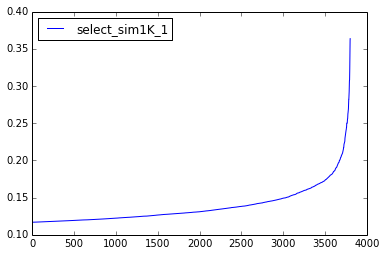

In [85]:
import matplotlib.pyplot as plt
from matplotlib import pylab
N = 3
for n in xrange(N):
    with open('/Users/joekaojoekao/PycharmProjects/push/github/visualized/select_sim1K_' + str(n+1) + '.txt', 'rb') as fin:
        lines = fin.read().split('\n')
    fin.close()
    sim_only = []
    for line in lines[:-1]:
        sim = line.split(',')[-1]
        sim_only.append(float(sim))
    #print sim_only
    
    plt.plot(sorted(sim_only),label="select_sim1K_"+str(n+1))
    plt.legend(loc='upper left')
    #plt.show()
    
    plt.savefig('visualized/select_sim_distrib1K_' + str(n+1) + '.png')

/opt/local/lib/pypy/site-packages/numpy/linalg/_umath_linalg.py:474: UserWarning: no cffi linalg functions and no _umath_linalg_capi module, expect problems.
  warn('no cffi linalg functions and no _umath_linalg_capi module, expect problems.')
Traceback (most recent call last):
  File "app_main.py", line 72, in run_toplevel
  File "app_main.py", line 627, in run_it
  File "<stdin>", line 1, in <module>
  File "/opt/local/lib/pypy/site-packages/matplotlib/pyplot.py", line 24, in <module>
    import matplotlib.colorbar
  File "/opt/local/lib/pypy/site-packages/matplotlib/colorbar.py", line 27, in <module>
    import matplotlib.artist as martist
  File "/opt/local/lib/pypy/site-packages/matplotlib/artist.py", line 8, in <module>
    from transforms import Bbox, IdentityTransform, TransformedBbox, \
  File "/opt/local/lib/pypy/site-packages/matplotlib/transforms.py", line 35, in <module>
    from matplotlib._path import (affine_transform, count_bboxes_overlapping_bbox,
ImportError: No modu

In [157]:
# %autoreload
# %aimport pttfunc
# dir(pttfunc)
for sim in sim_list:
    u1 = sim[0]
    u2 = sim[1]
    if pttfunc.has_same_ip(u1, u2):
        print u1, u2, sim[2]
print 'done'

done


In [182]:
from IPython.html.widgets import interact

def move(x):
    print " "*x + "ooo"
    
interact(move, x=(0,40));

                                        ooo


In [ ]:
## initial all data
%matplotlib inline
%load_ext autoreload
%autoreload 2
import jvcdata
import jvcfunc
all_idx = [i for i in xrange(0, len(jvcdata.jvc))]
jvc_grams_count, word_used = jvcdata.get_grams(1)


## map the 0~177 index to jvc_index
jvc_index = {}
for i in xrange(len(all_idx)):
    jvc_index[i] = int(jvcdata.jvc[i][0])
jvc_index_inv = {v: k for k, v in jvc_index.items()} #inverse lookup

##basic stop/rare words
from operator import itemgetter
target_idx = all_idx
merged_gc = {}
for idx in target_idx:
    for k, v in jvc_grams_count[idx].iteritems():
        if k in merged_gc:
            merged_gc[k] += v
        else:
            merged_gc[k]= v
sorted_merged_gc = []
for k, v in sorted(merged_gc.iteritems(), key=itemgetter(1), reverse=True):  
    sorted_merged_gc.append((k, merged_gc[k]))

sorted_merged_gc = [x for x in sorted_merged_gc if x[1] > 1] #remove 1 (meaningless)

## setting for stopword & rareword percentage
stopwords = [x for x in sorted_merged_gc if x[1] > sorted_merged_gc[int(len(sorted_merged_gc) * 0.025)][1]]
rarewords = [x for x in sorted_merged_gc if x[1] <= sorted_merged_gc[int(len(sorted_merged_gc) * 0.675)][1]] #0.975

## stop word list
sw_list = [x[0] for x in stopwords] 
## rare word list
rw_list = [x[0] for x in rarewords] 


## for weighted jaccard & rare word joint count
general_vec = []
jvc_rare_vec = []
for idx in all_idx:
    j_len = sum(jvc_grams_count[idx].values()) 
    #vec = [jvc_grams_count[idx].get(w, 0) for w in new_sw_list] #stopword without function words
    vec = [jvc_grams_count[idx].get(w, 0) for w in sw_list]
    g_vec = [float(x) / j_len for x in vec]
    general_vec.append(g_vec)
    
    ##process rare words vector
    j_vec = [0] * len(rw_list)
    for i, w in enumerate(rw_list):
        if w not in jvc_grams_count[idx]:
            j_vec[i] = 0
            #j_vec[i] = None
        else:
            j_vec[i] = jvc_grams_count[idx][w]
    jvc_rare_vec.append(j_vec)
    
## for ordered 2 gram
jvc_2grams_count = jvcdata.get_grams(2)[0]

sw_list, rw_list = jvcdata.sw_rw_words(jvc_2grams_count)
sw_vec = []
for idx in all_idx:
    j_len = sum(jvc_2grams_count[idx].values()) 
    vec = [jvc_2grams_count[idx].get(w, 0) for w in sw_list] #stopword without function words
    g_vec = [float(x) / j_len for x in vec]
    sw_vec.append(g_vec)

## for sentence length

jvc_sen_count, jvc_doc_count = jvcdata.get_pos(1)

j_len = jvcdata.get_len()
j_len_per = [[x for x in y if x > 5 and x < 200] for y in j_len]

j_all = []
for j in j_len:
    t = [x for x in j if x > 5 and x < 200] #filter those outlier
    j_all += t
import numpy as np
LOW = np.percentile(j_all, 25) #17,29
HIGH = np.percentile(j_all, 75)

j_len_code = []
for j in j_len:
    temp = []
    for s in j:
        if s < LOW:
            temp.append(0)
        elif s >= LOW and s < HIGH:
            temp.append(1)
        elif s >= HIGH:
            temp.append(2)
    j_len_code.append(temp)


j_len_percent = []
for j in j_len_code:
    temp = [j.count(0), j.count(1), j.count(2)]
    #print temp
    temp_percent = [(float(x) / len(j)) for x in temp]
    #print temp_percent
    j_len_percent.append(temp_percent)


##for word postion (sentence-oriented)

jvc_sen_count, jvc_doc_count = jvcdata.get_pos(1)

merged_sc = {}
for idx in all_idx:
    for k, v in jvc_sen_count[idx].iteritems():
        if k in merged_sc:
            merged_sc[k] += v
        else:
            merged_sc[k]= v

sorted_merged_sc = []
for k, v in sorted(merged_sc.iteritems(), key=itemgetter(1), reverse=True):  
    sorted_merged_sc.append((k, merged_sc[k]))
    
#remove 1
print len(sorted_merged_sc)
sorted_merged_sc = [x for x in sorted_merged_sc if x[1] > 1]
print len(sorted_merged_sc)
stopsc = [x for x in sorted_merged_sc if x[1] > sorted_merged_sc[int(len(sorted_merged_sc) * 0.025)][1]]
raresc = [x for x in sorted_merged_sc if x[1] <= sorted_merged_sc[int(len(sorted_merged_sc) * 0.975)][1]] #0.675

ssc_list = [x[0] for x in stopsc] #stop sc list
rsc_list = [x[0] for x in raresc] #stop sc list

#print rsc_list[0:100]


general_ssc_vec = []
rsc_vec = []
#jvc_rare_vec = []
for idx in all_idx:
    sum_len = sum(jvc_sen_count[idx].values())
    #vec = [jvc_grams_count[idx].get(w, 0) for w in new_sw_list] #stopword without function words
    vec = [jvc_sen_count[idx].get(w, 0) for w in ssc_list]
    g_vec = [float(x) / sum_len for x in vec]
    general_ssc_vec.append(g_vec)
    
    #rare
    vec = [jvc_sen_count[idx].get(w, 0) for w in rsc_list]
    r_vec = [float(x) / sum_len for x in vec]
    rsc_vec.append(r_vec)
    

## for word postion (document-oriented)
merged_dc = {}
for idx in all_idx:
    for k, v in jvc_doc_count[idx].iteritems():
        if k in merged_dc:
            merged_dc[k] += v
        else:
            merged_dc[k]= v

sorted_merged_dc = []
for k, v in sorted(merged_dc.iteritems(), key=itemgetter(1), reverse=True):  
    sorted_merged_dc.append((k, merged_dc[k]))
    
#remove 1
print len(sorted_merged_dc)
sorted_merged_dc = [x for x in sorted_merged_dc if x[1] > 1]
print len(sorted_merged_dc)
stopdc = [x for x in sorted_merged_dc if x[1] > sorted_merged_dc[int(len(sorted_merged_dc) * 0.025)][1]]
raredc = [x for x in sorted_merged_dc if x[1] <= sorted_merged_dc[int(len(sorted_merged_dc) * 0.975)][1]] #0.675

sdc_list = [x[0] for x in stopdc] #stop sc list
rdc_list = [x[0] for x in raredc] #stop sc list

general_sdc_vec = []
rdc_vec = []
for idx in all_idx:
    sum_len = sum(jvc_doc_count[idx].values()) 
    #vec = [jvc_grams_count[idx].get(w, 0) for w in new_sw_list] #stopword without function words
    vec = [jvc_doc_count[idx].get(w, 0) for w in sdc_list]
    g_vec = [float(x) / sum_len for x in vec]
    general_sdc_vec.append(g_vec)
    
    #rare
    vec = [jvc_doc_count[idx].get(w, 0) for w in rdc_list]
    r_vec = [float(x) / sum_len for x in vec]
    rdc_vec.append(r_vec)


In [ ]:
print jvc_doc_count[0]

In [ ]:
print jvc_sen_count[0]

In [ ]:
a = jvc_index_inv[196]
b = jvc_index_inv[381]
print a,b
print jvc_grams_count[a]
print jvc_grams_count[b]

In [ ]:
####author included
import json
#print jvcdata.jvc[100][0]
with open('ans_author_list.txt','rb') as f:
	jvc_author = json.loads(f.read())
#print jvc_author
for j in jvcdata.jvc:
    for k, v in jvc_author.iteritems():
        if int(j[0]) in v: print k, j[1]

In [ ]:
#print stopwords[0]
#print merged_gc
#print sorted_merged_gc[0:100]
print len(sorted_merged_gc)
plt.plot([x[1] for x in sorted_merged_gc[10:-10]])
plt.xlim(0, 5000)
plt.xlabel('idx')
plt.ylim(0, 100)
plt.ylabel('freq')
plt.show()
    #plt.hist(method_sim_list,bins=500,alpha=0.5)
#     #plt.xticks(np.arange(0, 1, 0.2))
#     plt.xticks(np.arange(0, 20, 1))
plt.plot([x[1] for x in sorted_merged_gc])
plt.xlim(5000,6000)
plt.ylim(0, 10)
plt.show()

In [ ]:
sw_list = [x[0] for x in stopwords] 
## rare word list
rw_list = [x[0] for x in rarewords] 
print sw_list[0:10]
print rw_list[0:100]

In [ ]:
## extra features (sentence length plus position)
import numpy as np
from itertools import chain

def chunker(seq, size):
    return (seq[pos:pos + size] for pos in xrange(0, len(seq), size))

j_len = jvcdata.get_len()
len_pos = []
for j in j_len:
    temp_j = []
    for pos, group in enumerate(chunker(j, len(j)/3+1)):
        temp_sen = []
        for l in group:
            temp_j.append((pos,l))
    
        #temp_j.append(temp_sen)
    len_pos.append(temp_j)
    
print len_pos[0]
print j_len_percent[0]

j_all = []
for j in j_len:
    t = [x for x in j if x > 5 and x < 200] #filter those outlier
    j_all += t
import numpy as np
LOW = np.percentile(j_all, 25) #17,29
HIGH = np.percentile(j_all, 75)

len_pos_code = [] #[(pos_level, len_level),..]
for j in len_pos:
    temp = []
    for s in j:
        if s[1] < LOW:
            temp.append((s[0],0))
        elif s[1] >= LOW and s[1] < HIGH:
            temp.append((s[0],1))
        elif s[1] >= HIGH:
            temp.append((s[0],2))
    len_pos_code.append(temp)
print len_pos_code[2]

len_pos_percent = []
for j in len_pos_code:
    temp = [j.count((0,0)), j.count((0,1)), j.count((0,2)), j.count((1,0)), j.count((1,1)), j.count((1,2)), j.count((2,0)), j.count((2,1)), j.count((2,2))]
    #print temp
    temp_percent = [(float(x) / len(j)) for x in temp]
    #print temp_percent
    len_pos_percent.append(temp_percent)

print len_pos_code[0]
print len_pos_percent[0]


In [ ]:
## extra feature (rw grams)
## for weighted jaccard & rare word joint count
rare_vec = []
rw_list = [x[0] for x in rarewords] 
for idx in all_idx:
    j_len = sum(jvc_grams_count[idx].values()) 
    #vec = [jvc_grams_count[idx].get(w, 0) for w in new_sw_list] #stopword without function words
    vec = [jvc_grams_count[idx].get(w, 0) for w in rw_list]
    r_vec = [float(x) / j_len for x in vec]
    rare_vec.append(r_vec)
    
    
#     ##process rare words vector
#     j_vec = [0] * len(rw_list)
#     for i, w in enumerate(rw_list):
#         if w not in jvc_grams_count[idx]:
#             j_vec[i] = 0
#             #j_vec[i] = None
#         else:
#             j_vec[i] = jvc_grams_count[idx][w]
#     jvc_rare_vec.append(j_vec)
    
    
## for ordered 2 gram
jvc_2grams_count = jvcdata.get_grams(2)[0]

sw_list, rw_list = jvcdata.sw_rw_words(jvc_2grams_count)
rw_vec = []
for idx in all_idx:
    j_len = sum(jvc_2grams_count[idx].values()) 
    vec = [jvc_2grams_count[idx].get(w, 0) for w in rw_list] #stopword without function words
    r_vec = [float(x) / j_len for x in vec]
    rw_vec.append(r_vec)


In [ ]:
## extra feature (sw joint)
sw_list = [x[0] for x in stopwords] 
jvc_stop_vec = []
for idx in all_idx:

    ##process stop words vector
    j_vec = [0] * len(sw_list)
    for i, w in enumerate(sw_list):
        if w not in jvc_grams_count[idx]:
            j_vec[i] = 0
            #j_vec[i] = None
        else:
            j_vec[i] = jvc_grams_count[idx][w]
    jvc_stop_vec.append(j_vec)
    
    



In [ ]:
sw_list = [x[0] for x in stopwords] 
## rare word list
rw_list = [x[0] for x in rarewords] 
print sw_list[0:10]
print rw_list[0:100]

In [ ]:
print len(rw_list)
a = jvc_index_inv[429]
b = jvc_index_inv[194]
print a, jvcdata.jvc[a][1]
print b, jvcdata.jvc[b][1]
s1 = [w for w in jvc_grams_count[a] if w in rw_list]
s2 = [w for w in jvc_grams_count[b] if w in rw_list]
print len(set(s1)), set(s1)
print len(set(s2)), set(s2)
print len(set(s1) & set(s2))
print (set(s1) & set(s2))
#print [x for x in jvc_stop_vec[0] if x in stopwords]
print '----'
sw1 = [x for x in jvc_rare_vec[a] if x is not 0]
sw2 = [x for x in jvc_rare_vec[b] if x is not 0]
print set(sw1)
print set(sw2)
print len(set(sw1) & set(sw2))

In [ ]:
print all_idx

In [ ]:
##mixed all features
import itertools
from scipy import spatial
import jvcfunc
import operator

sim_list = []
iters = list(itertools.combinations([x for x in xrange(0, len(all_idx))], 2))
for it in iters:
    
    idx1 = it[0]
    idx2 = it[1]
    wj_sw = jvcfunc.weighted_jacarrd(general_vec[idx1], general_vec[idx2])
#     def_j_sw = jvcfunc.def_jaccard(general_vec[idx1], general_vec[idx2])
#     def_c_sw = jvcfunc.def_cosine(general_vec[idx1], general_vec[idx2])
    
    wj_rw = jvcfunc.weighted_jacarrd(rare_vec[idx1], rare_vec[idx2])
    
#     rw1 = [x for x in jvc_rare_vec[it[0]] if x is not 0]
#     rw2 = [x for x in jvc_rare_vec[it[1]] if x is not 0]
    rw1 = [w for w in jvc_grams_count[it[0]] if w in rw_list]
    rw2 = [w for w in jvc_grams_count[it[1]] if w in rw_list]
    joint_rj = len(set(rw1) & set(rw2))
    
#     sw1 = [x for x in jvc_stop_vec[it[0]] if x is not 0]
#     sw2 = [x for x in jvc_stop_vec[it[1]] if x is not 0]
    sw1 = [w for w in jvc_grams_count[it[0]] if w in sw_list]
    sw2 = [w for w in jvc_grams_count[it[1]] if w in sw_list]
    joint_sj = len(set(sw1) & set(sw2))
    
    wj_2gram = jvcfunc.weighted_jacarrd(sw_vec[idx1], sw_vec[idx2])
    
    wj_2gram_rw = jvcfunc.weighted_jacarrd(rw_vec[idx1], rw_vec[idx2])
    
    v1 = j_len_percent[idx1]
    v2 = j_len_percent[idx2]
    wj_senlen = jvcfunc.weighted_jacarrd(v1, v2)
    
    wj_ssc = jvcfunc.weighted_jacarrd(general_ssc_vec[idx1], general_ssc_vec[idx2]) 
    wj_sdc = jvcfunc.weighted_jacarrd(general_sdc_vec[idx1], general_sdc_vec[idx2])
    
    v1 = len_pos_percent[idx1]
    v2 = len_pos_percent[idx2]
    wj_lenpos = jvcfunc.weighted_jacarrd(v1, v2)
    
    j_idx1 = int(jvcdata.jvc[it[0]][0])
    j_idx2 = int(jvcdata.jvc[it[1]][0])
    
    wj_rsc = jvcfunc.weighted_jacarrd(rsc_vec[idx1], rsc_vec[idx2]) 
    wj_rdc = jvcfunc.weighted_jacarrd(rdc_vec[idx1], rdc_vec[idx2]) 
    
    
    sim_list.append((j_idx1, j_idx2, wj_sw, joint_rj, wj_2gram, wj_senlen, wj_ssc, wj_sdc, wj_lenpos, wj_rw, wj_2gram_rw, joint_sj, wj_rsc, wj_rdc))

## output to csv file
head = 'idx1,idx2,level,wj_sw,joint_rj,wj_2gram,wj_senlen,wj_sw_sen_pos,wj_sw_doc_pos,wj_lenpos,wj_rw,wj_2gram_rw,joint_sj,wj_rsc,wj_rdc'
out = jvcfunc.eval_merged_output2(sim_list, 'methods_merged_result_v3_edit_joint', head)

##build sim_dict to lookup
sim_dict = dict([((x[0], x[1]),x[2:]) for x in sim_list])

##build pair_level table to lookup
pair_level = [(tuple(x[0:2]), x[2]) for x in out]
pair_level_lookup = {'1':[], '1.5':[], '2':[], '3':[], '5':[]}
for p in pair_level:
    pair_level_lookup[p[1]].append(p[0])


In [ ]:
import jvcfunc
## output to csv file
head = 'idx1,idx2,level,wj_sw,joint_rj,wj_2gram,wj_senlen,wj_sw_sen_pos,wj_sw_doc_pos,wj_lenpos,wj_rw,wj_2gram_rw,joint_sj,wj_rsc,wj_rdc'
out = jvcfunc.eval_merged_output2(sim_list, 'methods_merged_result_v3_edit_joint', head)

##build sim_dict to lookup
sim_dict = dict([((x[0], x[1]),x[2:]) for x in sim_list])

##build pair_level table to lookup
pair_level = [(tuple(x[0:2]), x[2]) for x in out]
pair_level_lookup = {'1':[], '1.5':[], '2':[], '3':[], '5':[]}
for p in pair_level:
    pair_level_lookup[p[1]].append(p[0])

In [ ]:
print sim_list[0:12]

In [ ]:
## tuning time

def thres_tune(method_sim_list):
    import math
    from detect_peaks import detect_peaks
    ## find slope and critical points
    
    #plt.hist(method_sim_list,bins=500,alpha=0.5)
#     #plt.xticks(np.arange(0, 1, 0.2))
#     plt.xticks(np.arange(0, 20, 1))
    #plt.show()
    a = method_sim_list
    b = np.arange(0,1.0,0.001)
    
    #derivation
    hist, bin_edges = np.histogram(a, bins=b)
    bin_edges = np.delete(bin_edges, 0)
    
    slope = np.diff(hist[0::1])
    #print len([x for x in zip(bin_edges,slope)])
    #for x in slope[580:620]:
        #print("%.2f" % x)
    #ind = detect_peaks(slope,mph=15, show=True)
    
    # make all positive
    new_slope = slope.clip(min=0)
    ind = detect_peaks(new_slope,mpd=10, show=False) #mph=15
    
    #method_thres = float(ind[-1])/1000
    return ind#method_thres

# sim_only = [x[2:] for x in sim_list]
# method_sim_list = [float(x[9]) for x in sim_only]
# thres_tune(method_sim_list)




sim_only = [x[2:] for x in sim_list]
thres_list = []
thres_dict = {}
for m in xrange(0, 12):
    if m == 1 :
        #thres = 2
        #thres_list.append(thres)
        continue
    if m == 9:
        #thres = 15
        #thres_list.append(thres)
        continue
        
    print 'method', m+1
    method_sim = [float(x[m]) for x in sim_only]
    #print method_sim
    #break
    #print method_sim
    thres = thres_tune(method_sim)
    print thres
    thres = [float(x)/1000 for x in sorted(thres, reverse=True)]
    thres_list.append(list(thres))
    
    #new_thres = [x for x in thres if x > thres[int(len(thres) * 0.675)]]
    #print new_thres
    thres_dict[m] = thres

In [ ]:
sim_only = [x[2:] for x in sim_list]
print sim_only

In [ ]:
## tuning time
#print sim_list[0:10]

def thres_tune_jointnum(method_sim_list):
    import math
    #from detect_peaks import detect_peaks

    from collections import Counter

    method_thres = [int(x) for x in sorted(Counter(method_sim_list).keys())]
    print method_thres
    return method_thres

# sim_only = [x[2:] for x in sim_list]
# method_sim_list = [float(x[9]) for x in sim_only]
# thres_tune(method_sim_list)


sim_only = [x[2:] for x in sim_list]
#thres_list = []
for m in [1,9]:
    print 'method', m+1
    method_sim = [float(x[m]) for x in sim_only]
    #print method_sim
    #break
    #print method_sim
    thres = thres_tune_jointnum(method_sim)
    print thres
    thres = [x for x in sorted(thres, reverse=True)]
    thres_list.insert(m,thres)
    thres_dict[m] = thres

In [ ]:
thres_pick = []
for i,th in enumerate(thres_list):
    #print i,th
    if len(th) > 10:
        #print i,
        #print th[::len(th)/10]
        thres_pick.append(th[::len(th)/10])
    else:
        #print i,th
        thres_pick.append(th)
    
#import itertools
print thres_pick

In [ ]:
# mul_result = 1
# for k in thres_dict.keys():
#     print len(thres_dict[k])
#     mul_result *= len(thres_dict[k])
# print mul_result

# for k in thres_dict.keys():
#     print k, len(thres_dict[k])
#     for v in sorted(thres_dict[k],reverse=True):
#         print v
#     break
td = thres_dict    

iter_td = [(a,b,c,d,e,f,g,h,i,j,k,l) for a in td[0] for b in td[1] for c in td[2] for d in td[3] for e in td[4] for f in td[5] for g in td[6] for h in td[7] for i in td[8] for j in td[9] for k in td[10] for l in td[11]]
for t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12 in iter_td:
    print t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12
    break

In [ ]:
## make threshold list and get pairs larger than threshold
#thres_list = [method1_thres, method2_thres, method3_thres, method4_thres, method5_thres, method6_thres, method7_thres]
thres_list = [x[2] for x in thres_pick]
print thres_list
pair_gt_thres = []

#cur_result = []
for i, th in enumerate(thres_list):
    temp = []
    for sim in sim_list:
        cur_th = sim[i+2]
        if cur_th >= th:
            temp.append((sim[0],sim[1]))
        
    pair_gt_thres.append(temp)
    
correct_pair = [x[0] for x in pair_level if x[1] != '5']
for i, m in enumerate(pair_gt_thres):
    print 'single method', i+1,':', len(m)
    print 'correct:',len(set(correct_pair) & set(m))
    P = float(len(set(correct_pair) & set(m))) / len(m)
    print 'P:', P
    print '\n===========================\n'
    
    #cur_result.append((i+1,list(set(correct_pair) & set(m))))



In [ ]:
cur_result = jvcdata.method_comb(12, 1, sim_dict, pair_level, pair_gt_thres)


In [ ]:

cur_result = jvcdata.method_comb(12, 3, sim_dict, pair_level, pair_gt_thres)

In [ ]:
for cur in cur_result:
    if cur[0] == [1,3,8,9,10]:
        print cur[1]
        print len(cur[1])
        find_pair = cur[1]
        break_pair = list(set([list(t) for t in zip(*find_pair)][0] + [list(t) for t in zip(*find_pair)][1]))
        print sorted(break_pair)
        print len(break_pair)
#         for k,v in pair_level_lookup.iteritems():
#             for pair in cur[1]:
#                 if pair in v:
#                     print k



In [ ]:
import itertools
thres_comb = list(itertools.product(*[thres_pick[1],thres_pick[7]]))

#thres_comb = [list(x) for x in thres_comb]
print thres_comb

In [ ]:
gogomethod = [2,5,8]
########## method assign to 2,8
me = [(x-1) for x in gogomethod] # method index
import itertools
comb = []
for i in me:
    comb.append(thres_pick[i])
thres_comb = list(itertools.product(*comb))

## make threshold list and get pairs larger than threshold

correct_pair = [x[0] for x in pair_level if x[1] != '5']
#me = [1,7] # method index

#cur_result = []
max_glb_P = [0,[],()]
max_glb_R = [0,[],()]
max_glb_F = [0,[],()]
for c in thres_comb:
    print 'thres parameter:', c
    
    pair_gt_thres = {}
    for i, th in enumerate(c): 
        temp = []
        for sim in sim_list:
            cur_th = sim[me[i]+2]
            if cur_th >= th:
                temp.append((sim[0],sim[1]))

        pair_gt_thres[me[i]] = temp
        
    
    
    max_lcl_P = [0,[]]
    max_lcl_R = [0,[]]
    max_lcl_F = [0,[]]
    for i in xrange(1, len(me)+1):
        local_result = jvcdata.method_assign(2, i, sim_dict, pair_level, pair_gt_thres, me) #每次C m取n的result
        # return [(max_P, max_P_method),(max_R, max_R_method),(max_F1, max_F1_method)]
        P = local_result[0] 
        R = local_result[1]
        F = local_result[2]
        
        if P[0] > max_lcl_P[0]:
            max_lcl_P[0] = P[0]
            max_lcl_P[1] = P[1]
        if R[0] > max_lcl_R[0]:
            max_lcl_R[0] = R[0]
            max_lcl_R[1] = R[1]
        if F[0] > max_lcl_F[0]:
            max_lcl_F[0] = F[0]
            max_lcl_F[1] = F[1]
    
    
    print '\nP(max):', max_lcl_P[0]
    print 'in method pair:', max_lcl_P[1]
    print '\nR(max):', max_lcl_R[0]
    print 'in method pair:', max_lcl_R[1]
    print '\nF1(max):', max_lcl_F[0]
    print 'in method pair:', max_lcl_F[1]
	
    
    print '\n#######################################################\n'
    
    if max_lcl_P[0] > max_glb_P[0]:
        max_glb_P[0] = max_lcl_P[0]
        max_glb_P[1] = max_lcl_P[1]
        max_glb_P[2] = c
    if max_lcl_R[0] > max_glb_R[0]:
        max_glb_R[0] = max_lcl_R[0]
        max_glb_R[1] = max_lcl_R[1]
        max_glb_R[2] = c
    if max_lcl_F[0] > max_glb_F[0]:
        max_glb_F[0] = max_lcl_F[0]
        max_glb_F[1] = max_lcl_F[1]
        max_glb_F[2] = c

    
print '%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%'
print '\nglobal P(max):', max_glb_P[0]
print 'in method pair:', max_glb_P[1]
print 'with parameter:', max_glb_P[2]
print '\nglobal R(max):', max_glb_R[0]
print 'in method pair:', max_glb_R[1]
print 'with parameter:', max_glb_R[2]
print '\nglobal F1(max):', max_glb_F[0]
print 'in method pair:', max_glb_F[1]
print 'with parameter:', max_glb_F[2]
print '%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%'

In [ ]:
### fagin's algorithm
#print sim_list[0:10]
#methods = zip(*sim_list)
#print methods[5][0:10]
sim_pair = {}
for i in xrange(2,len(sim_list[0])):
    for sim in sim_list:
        pair_idx = (sim[0],sim[1])
        if pair_idx in sim_pair:
            sim_pair[pair_idx].append((pair_idx,(sim[i])))
        else:
            sim_pair[pair_idx]=[(pair_idx,(sim[i]))]

In [ ]:
for k in sim_pair.keys()[0:10]:
    print k, sim_pair[k]


In [ ]:
print sim_dict[(12, 687)]
print sim_pair[(12, 687)]

In [ ]:
from operator import itemgetter
top_k = 10
method_ssp = []
sorted_sim_pair = []
for i in xrange(0,len(sim_pair.values()[0])):
    temp = []
    for k in sim_pair.keys():
        temp.append(sim_pair[k][i])
    sorted_sim_pair.append(sorted(temp, key=itemgetter(1), reverse=True))
for i, ssp in enumerate(sorted_sim_pair):
    print i
    #print ssp
    print len(ssp)
    break
print len(zip(*sorted_sim_pair)[0])
print len(zip(*sorted_sim_pair))
print zip(*sorted_sim_pair)[0]

In [ ]:
seen = {}
obj = []
m_num = len(zip(*sorted_sim_pair)[0]) #12
for ssp in zip(*sorted_sim_pair):
    #print ssp
    for i in xrange(m_num): #try 12 methods
        if ssp[i][0] not in seen:
            seen[ssp[i][0]] = 1
        else:
            seen[ssp[i][0]] += 1
        
    #print '--'
    if m_num in seen.itervalues():
        get_pair = seen.keys()[seen.values().index(m_num)]
        #print get_pair
        obj.append(get_pair)
        seen[get_pair] = -1
    if len(obj) == top_k:
        break
print obj
# for o in obj:
#     for p in pair_level:
#         if p[0] == o:
#             print 'level',p[1]
# #     if o in correct_pair:
# #         print 'yes'
# #     else:
# #         print 'fuck'

In [ ]:
#print pair_level_lookup.keys()[pair_level_lookup.values().index((7,8))]
print pair_level

In [ ]:
print zip(*sorted_sim_pair)[-1][0]